In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(xtrain,ytrain),(xtest,ytest) = keras.datasets.mnist.load_data()

In [4]:
xtrain = xtrain/255
xtest = xtest/255

In [5]:
len(xtrain)

60000

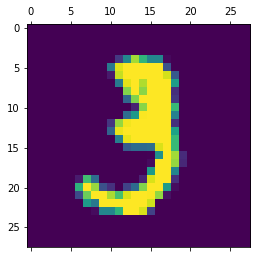

In [6]:
plt.matshow(xtrain[10])

In [7]:
ytrain[10]

3

In [8]:
xtrain.shape

(60000, 28, 28)

In [9]:
xtrain_f = xtrain.reshape(len(xtrain),784)
xtest_f = xtest.reshape(len(xtest),784)

In [10]:
xtrain_f.shape

(60000, 784)

In [11]:
xtrain_f

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
# Sequential means that data is contained in flattened layers
# Dense means that every input is connected to ten labels that are
# used as output
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(xtrain_f,ytrain,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 635us/step - loss: 0.7383 - accuracy: 0.8063
Epoch 2/5
1875/1875 [==============================] - 1s 626us/step - loss: 0.3051 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 1s 595us/step - loss: 0.2847 - accuracy: 0.9200
Epoch 4/5
1875/1875 [==============================] - 1s 592us/step - loss: 0.2731 - accuracy: 0.9246
Epoch 5/5
1875/1875 [==============================] - 1s 573us/step - loss: 0.2651 - accuracy: 0.9253


In [13]:
model.evaluate(xtest_f,ytest)

313/313 [==============================] - 0s 505us/step - loss: 0.2670 - accuracy: 0.9256


[0.2670212388038635, 0.925599992275238]

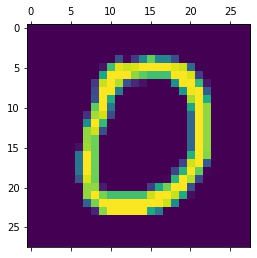

In [14]:
plt.matshow(xtest[10])

In [15]:
y_pred = model.predict(xtest_f)
y_pred[0]

array([3.40546072e-02, 2.79128187e-07, 5.52363098e-02, 9.60180700e-01,
       2.76175141e-03, 1.21597946e-01, 1.52583300e-06, 9.99713659e-01,
       1.06361121e-01, 6.32623315e-01], dtype=float32)

In [16]:
ypred = [np.argmax(i) for i in y_pred]

In [17]:
cm = tf.math.confusion_matrix(labels=ytest,predictions=ypred)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    5,    3,    2,    2,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   7,    9,  922,   17,    8,    5,   10,   10,   41,    3],
       [   4,    0,   18,  914,    0,   28,    2,   12,   26,    6],
       [   2,    1,    7,    1,  918,    0,    8,    4,   10,   31],
       [   9,    2,    3,   32,    8,  781,   11,    5,   36,    5],
       [  12,    3,   11,    1,    8,   18,  900,    2,    3,    0],
       [   1,    5,   23,    4,    9,    1,    0,  952,    4,   29],
       [   5,    8,    6,   15,    9,   23,    8,   10,  886,    4],
       [  11,    7,    1,   11,   31,    7,    0,   22,   12,  907]])>

Text(69.0, 0.5, 'Actual')

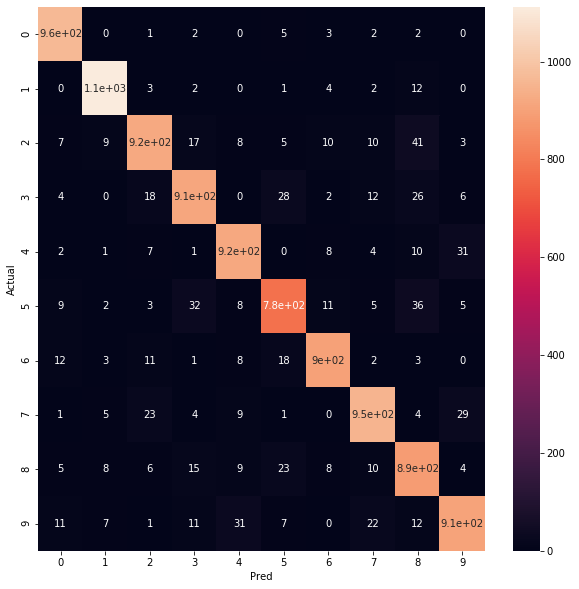

In [18]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)
plt.xlabel('Pred')
plt.ylabel('Actual')

In [19]:
##Adding a hidden layer
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

call_back = tf.keras.callbacks.TensorBoard(log_dir='logs/',histogram_freq=1)

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(xtrain_f,ytrain,epochs=5,callbacks=[call_back])

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4560 - accuracy: 0.8694
Epoch 2/5
1875/1875 [==============================] - 2s 848us/step - loss: 0.1335 - accuracy: 0.9610
Epoch 3/5
1875/1875 [==============================] - 2s 891us/step - loss: 0.0871 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 2s 898us/step - loss: 0.0682 - accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 2s 874us/step - loss: 0.0509 - accuracy: 0.9849


In [20]:
y_pred = model.predict(xtest_f)
y_pred[0]
ypred = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=ytest,predictions=ypred)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    1,    2,    2,    0,    3,    1,    1,    2,    4],
       [   0, 1124,    5,    0,    0,    0,    2,    1,    3,    0],
       [   1,    5, 1004,    4,    2,    0,    3,    7,    6,    0],
       [   1,    1,    4,  989,    0,    1,    0,    7,    5,    2],
       [   3,    0,    5,    0,  955,    0,    3,    2,    1,   13],
       [   2,    0,    0,   11,    1,  863,    4,    1,    7,    3],
       [   0,    5,    2,    1,    4,    3,  940,    0,    3,    0],
       [   1,    5,   10,    2,    0,    0,    0, 1006,    0,    4],
       [   5,    3,    1,    4,    3,    2,    4,    2,  948,    2],
       [   1,    6,    0,    2,    7,    2,    1,    8,    2,  980]])>

Text(69.0, 0.5, 'Actual')

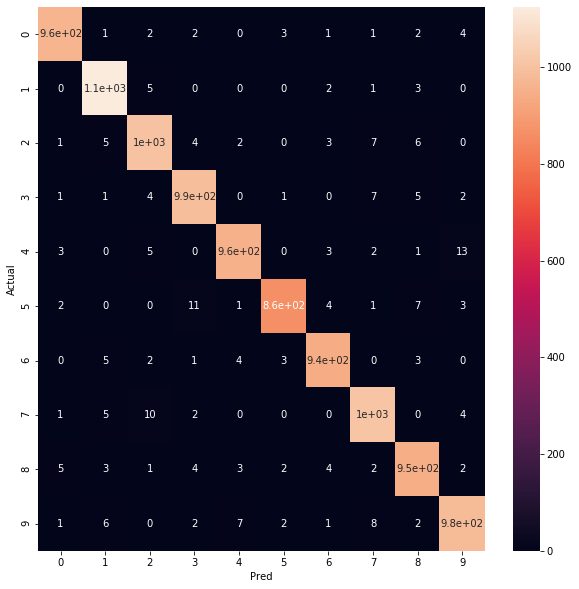

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)
plt.xlabel('Pred')
plt.ylabel('Actual')

In [22]:
%load_ext tensorboard

In [23]:
%tensorboard --logdir logs/train

Reusing TensorBoard on port 6006 (pid 10336), started 0:05:58 ago. (Use '!kill 10336' to kill it.)